In [7]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import cv2, os
from skimage import feature
from sklearn import metrics
import seaborn as sns
import glob

In [8]:
Dataset_folder = '/Users/ankitkpr93/Downloads/cropped/'

In [11]:
!rm -rf /Users/ankitkpr93/UTS_projects/Defence/Dataset/Dataset_SVM_drone_and_payload_and_other_7_classification/drone*/.DS_Store
!rm -rf /Users/ankitkpr93/UTS_projects/Defence/Dataset/Dataset_SVM_drone_and_payload_and_other_7_classification/.DS_Store
!rm -rf /Users/ankitkpr93/Downloads/cropped/.DS_Store

In [12]:
labelnames=os.listdir(Dataset_folder)
print (labelnames)
images = glob.glob(Dataset_folder+'/*/*',recursive=True)
print (len(images))

['small-bird', 'vehicle', 'drone_dji-mavic-pro-payload', 'drone_dji-mavic-pro', 'bee', 'drone_dji-mavic-pro-hanging-payload', 'drone_dji-mavic-air', 'drone_dji-phantom-4-pro-hanging-payload', 'bird', 'drone_dji-phantom-4-pro_with_payload', 'drone_parrot-anafi', 'drone_yuneec-typhoon-h', 'drone_dji-matrice-600', 'drone_parrot-mambo', 'drone_dji-phantom-4-pro', 'human', 'drone_dji-mavic-pro_with_payload', 'drone_dji-phantom-4-pro-payload', 'drone_3dr-solo']
76612


In [13]:
data = []
labels = []
size = (60,30)

In [14]:
for each in images:
    img = cv2.imread(each,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,size)
    data.append(img)
    labels.append(labelnames.index(each.split("/")[-2]))
print (len(labels))

76612


In [15]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [85]:
data = np.array(data)
data.shape

(69423, 30, 60)

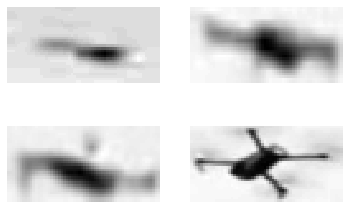

In [86]:
# view few images and print its corresponding label
img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(data[img_index],cmap='gray')

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(data[img_index],cmap='gray')

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 2000
ax2.imshow(data[img_index],cmap='gray')

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 3000
ax2.imshow(data[img_index],cmap='gray')

In [87]:
hog_features = []
for img_index in range(len(data)):
    # load the image, and extract HOG features
    image = (data[img_index])
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    '''H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")'''
    H = feature.hog(image, orientations=9, pixels_per_cell=(6, 6),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

    # update the data and labels
    hog_features.append(H)
print(np.shape(hog_features))

(69423, 1296)


In [88]:
labels =  np.array(labels).reshape(len(labels),1)
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)
percentage = 90
partition = int(len(hog_features)*percentage/100)
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

#clf.fit(x_train,y_train)
model = svm.SVC(kernel='rbf',C=100.0, random_state=42,gamma='auto',verbose=True) # rbf Kernel
model.fit(x_train,y_train)

[LibSVM]

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [89]:
print (x_train.shape)
print (x_test.shape)
print (y_test.shape)
print (y_train.shape)

(62480, 1296)
(6943, 1296)
(6943,)
(62480,)


In [94]:
print("Train set Accuracy: {:.2f}".format(model.score(x_train,y_train)))

Train set Accuracy: 0.95


In [90]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')  
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9324499495895147


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00        30
         2.0       0.90      0.89      0.89      1401
         3.0       0.00      0.00      0.00         3
         4.0       0.93      0.95      0.94       133
         5.0       0.90      0.94      0.92      1472
         6.0       0.97      0.93      0.95       162
         7.0       0.00      0.00      0.00         6
         8.0       0.97      0.96      0.97       434
         9.0       0.95      0.90      0.92       400
        10.0       0.98      0.98      0.98       468
        11.0       0.99      0.97      0.98       102
        12.0       0.94      0.79      0.86       125
        13.0       0.95      0.96      0.96      1885
        14.0       1.00      1.00      1.00         4
        15.0       0.99      0.95      0.97       175
        16.0       0.94      0.87      0.90  

/Users/ankitkpr93/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix
[[   0    0    1    0    0    2    0    0    0    0    0    0    0    1
     0    0    0]
 [   0   30    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0 1245    0    0  108    0    0    0   11    3    1    4   27
     0    1    1]
 [   0    0    0    0    0    1    0    0    0    0    0    0    0    2
     0    0    0]
 [   0    0    1    0  127    1    2    0    0    0    0    0    0    2
     0    0    0]
 [   0    0   66    0    1 1379    0    0    0    7    2    0    1   14
     0    1    1]
 [   0    0    3    0    4    1  150    0    0    0    0    0    0    4
     0    0    0]
 [   0    0    3    0    0    0    0    0    0    0    0    0    0    3
     0    0    0]
 [   0    0    1    0    0    2    0    0  418    0    0    0    0   12
     0    0    1]
 [   0    0   19    0    0   18    0    0    0  361    0    0    0    2
     0    0    0]
 [   0    0    1    0    2    2    0    0    0    0  457    0    0    6
     0    0

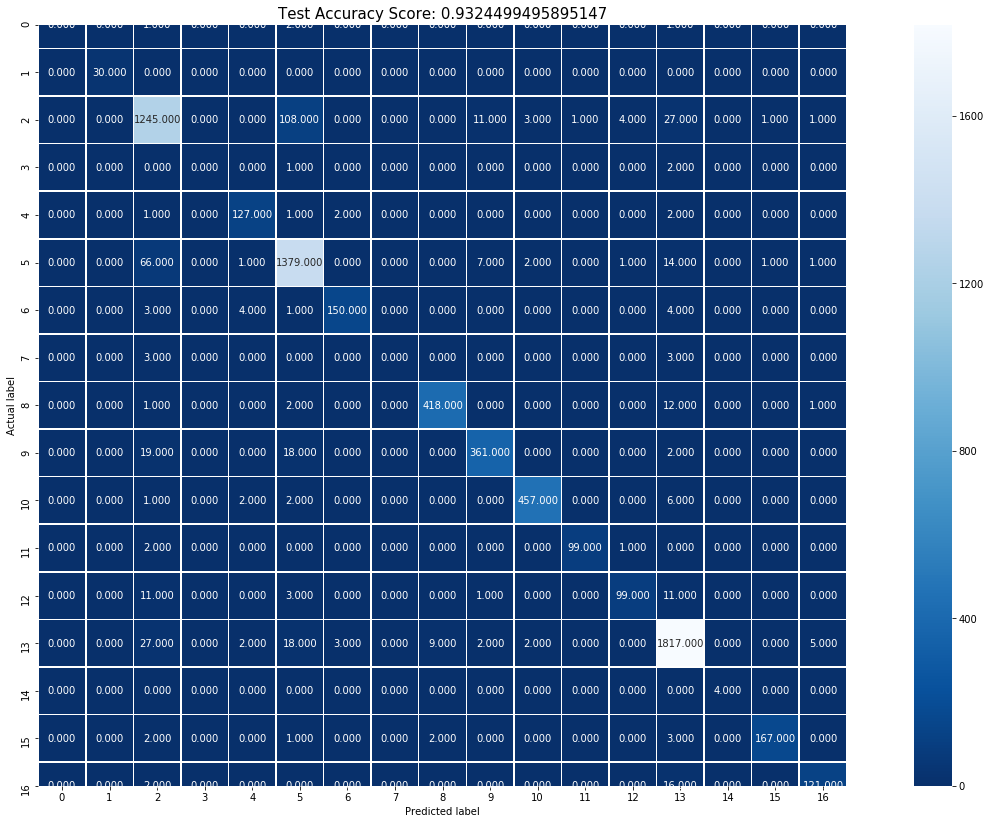

In [91]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, y_pred)
print ("Confusion matrix")
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(24,14))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [92]:
import joblib
filename = '/Users/ankitkpr93/Downloads/joblib_17_classes_6x6.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
#model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

['/Users/ankitkpr93/Downloads/joblib_17_classes_6x6.sav']

In [16]:
import pickle
filename = '/Users/ankitkpr93/Downloads/pickle_17_classes_6x6.sav'
#pickle.dump(model, open(filename, 'wb'))

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [6]:
images = []
orig_labels=[]
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(500, len(labels)), size=(16,)):
    # classify the clothing
    test_img = (data[i])
    H = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

    pred = model.predict(H.reshape(1, -1))[0]
    #prediction = model.predict(test_img.reshape(1, -1))
    label = labelnames[int(pred)]
    orig_labels.append(labelnames[int(labels[i])])
    color = (0, 255, 0)
    test_img = cv2.merge([test_img] * 3)
    test_img = cv2.resize(test_img, (60, 30), interpolation=cv2.INTER_LINEAR)
    cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
    images.append(test_img)

NameError: name 'labels' is not defined

In [4]:
fig = plt.figure(figsize=(16,9))



ax1 = fig.add_subplot(2,4,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,4,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,4,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,4,4)
ax4.imshow(images[4])
print(orig_labels[4])
plt.figure(figsize=(16,9))


ax5 = fig.add_subplot(1,4,1)
ax5.imshow(images[5])
print(orig_labels[5])
ax6 = fig.add_subplot(1,4,2)
ax6.imshow(images[6])
print(orig_labels[6])
ax7 = fig.add_subplot(1,4,3)
ax7.imshow(images[7])
print(orig_labels[7])
ax8 = fig.add_subplot(1,4,4)
ax8.imshow(images[8])
print(orig_labels[8])

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'drone_dji-mavic-pro-hanging-payload')

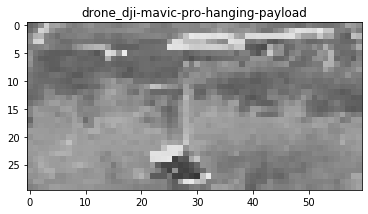

In [31]:
labelnames = ['small-bird', 'vehicle', 'drone_dji-mavic-pro', 'bee', 'drone_dji-mavic-pro-hanging-payload', 'drone_dji-mavic-air', 'drone_dji-phantom-4-pro-hanging-payload', 'bird', 'drone_dji-phantom-4-pro_with_payload', 'drone_parrot-anafi', 'drone_yuneec-typhoon-h', 'drone_dji-matrice-600', 'drone_parrot-mambo', 'drone_dji-phantom-4-pro', 'human', 'drone_dji-mavic-pro_with_payload', 'drone_3dr-solo']
#Inference
import pickle
filename = '/Users/ankitkpr93/Downloads/pickle_17_classes_6x6.sav'
loaded_model = pickle.load(open(filename, 'rb'))
img = cv2.imread("/Users/ankitkpr93/Downloads/cropped/drone_dji-mavic-pro-hanging-payload/2020-05-21_0109_001260.jpg",cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,size)
H = feature.hog(img, orientations=9, pixels_per_cell=(6, 6),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

pred = loaded_model.predict(H.reshape(1, -1))[0]
#prediction = model.predict(test_img.reshape(1, -1))
label = labelnames[int(pred)]
color = (0, 255, 0)
test_img = cv2.merge([img] * 3)
test_img = cv2.resize(test_img, (60, 30), interpolation=cv2.INTER_LINEAR)
#cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
plt.imshow(test_img)
plt.title(label)